In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r2/title_r2_20k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 20000 drug-target pairs
encoding drug...
unique drugs: 18462
encoding protein...
unique target sequence: 1891
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 50.7914. Total time 0.00055 hours
Validation at Epoch 1 with loss:2.07470, MSE: 2.18352 , Pearson Correlation: 0.17653 with p-value: 1.83E-15 , Concordance Index: 0.54771
Training at Epoch 2 iteration 0 with loss 1.90981. Total time 0.0275 hours
Validation at Epoch 2 with loss:2.33006, MSE: 2.17885 , Pearson Correlation: 0.28387 with p-value: 2.21E-38 , Concordance Index: 0.58415
Training at Epoch 3 iteration 0 with loss 1.92727. Total time 0.06027 hours
Validation at Epoch 3 with loss:2.27948, MSE: 2.07423 , Pearson Correlation: 0.25796 with p-value: 9.09E-32 , Concordance Index: 0.57764
Training at Epoch 4 iteration 0 with loss 2.06332. Total time 0.09416 hours
Validation at Epoch 4 with loss:1.80541, MSE: 1.97944 , Pearson Correlation: 0.32781 with p-value: 2.58E-51 , Concordance Index: 0.59785
Training at Epoch 5 iteration 0 with loss 2.12959. Total time 0.12777 hours
Validat

Training at Epoch 39 iteration 0 with loss 0.82598. Total time 1.00527 hours
Validation at Epoch 39 with loss:1.79233, MSE: 1.67924 , Pearson Correlation: 0.54828 with p-value: 2.42E-157 , Concordance Index: 0.68275
Training at Epoch 40 iteration 0 with loss 0.44815. Total time 1.02666 hours
Validation at Epoch 40 with loss:1.47777, MSE: 1.68812 , Pearson Correlation: 0.53572 with p-value: 5.76E-149 , Concordance Index: 0.67707
Training at Epoch 41 iteration 0 with loss 0.46713. Total time 1.04722 hours
Validation at Epoch 41 with loss:1.75797, MSE: 1.72002 , Pearson Correlation: 0.53835 with p-value: 1.08E-150 , Concordance Index: 0.67897
Training at Epoch 42 iteration 0 with loss 0.37132. Total time 1.06805 hours
Validation at Epoch 42 with loss:1.83310, MSE: 1.76875 , Pearson Correlation: 0.52938 with p-value: 7.08E-145 , Concordance Index: 0.67573
Training at Epoch 43 iteration 0 with loss 0.40353. Total time 1.08861 hours
Validation at Epoch 43 with loss:1.70724, MSE: 1.82570 , Pe

Training at Epoch 77 iteration 0 with loss 0.20636. Total time 1.69638 hours
Validation at Epoch 77 with loss:1.69648, MSE: 1.83754 , Pearson Correlation: 0.52477 with p-value: 6.01E-142 , Concordance Index: 0.67493
Training at Epoch 78 iteration 0 with loss 0.19099. Total time 1.71388 hours
Validation at Epoch 78 with loss:2.29259, MSE: 1.94882 , Pearson Correlation: 0.51578 with p-value: 2.23E-136 , Concordance Index: 0.67158
Training at Epoch 79 iteration 0 with loss 0.31964. Total time 1.73083 hours
Validation at Epoch 79 with loss:2.01554, MSE: 1.90868 , Pearson Correlation: 0.52578 with p-value: 1.37E-142 , Concordance Index: 0.67499
Training at Epoch 80 iteration 0 with loss 0.22363. Total time 1.74861 hours
Validation at Epoch 80 with loss:1.74897, MSE: 1.80292 , Pearson Correlation: 0.51909 with p-value: 2.06E-138 , Concordance Index: 0.67277
Training at Epoch 81 iteration 0 with loss 0.23249. Total time 1.76388 hours
Validation at Epoch 81 with loss:2.02021, MSE: 1.88782 , Pe

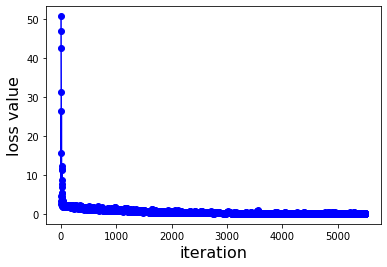

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r2/model_r2_20k_100epochs')